In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline 

In [5]:
sales = pd.read_csv("Philadelphia_Crime_Rate_noNA.csv")

In [91]:
sales.head()

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks


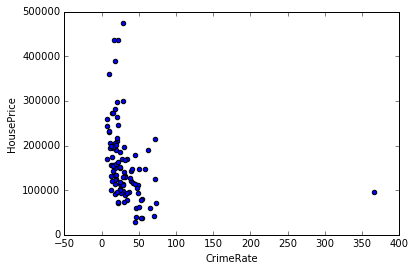

In [57]:
sales.plot(kind='scatter',x='CrimeRate',y='HousePrice')  #to plot scatter plot

In [8]:
from sklearn import linear_model

In [9]:
reg=linear_model.LinearRegression()

In [58]:
X=sales[['CrimeRate']]

In [59]:
X.head()

,CrimeRate
0,29.7
1,24.1
2,19.5
3,49.4
4,54.1


In [60]:
y=sales[['HousePrice']]

In [61]:
y.head()

,HousePrice
0,140463
1,113033
2,124186
3,110490
4,79124


In [62]:
crime_model=reg.fit(X,y)

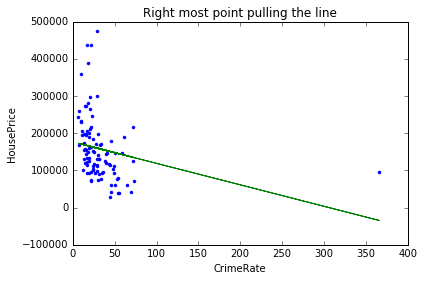

In [63]:
plt.plot(sales['CrimeRate'],sales['HousePrice'],'.',sales['CrimeRate'],crime_model.predict(X),'-')#by default scatter plot
plt.title("Right most point pulling the line")
plt.xlabel("CrimeRate")
plt.ylabel("HousePrice")

# remove the right most city

In [64]:
sales[sales['CrimeRate']>350]

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
62,96200,9.62,366.1,0.0,4.8,"Phila,CC",Phila


#### So it is a center city because MilesPhila(distance from center city is zero)

In [65]:
sales_noCC=sales[sales['MilesPhila']!=0.0]

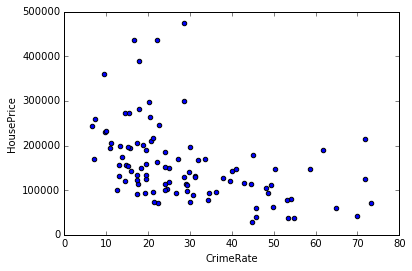

In [66]:
sales_noCC.plot(kind='scatter',x='CrimeRate',y='HousePrice')

In [67]:
X_noCC=sales_noCC[['CrimeRate']]

In [68]:
y_noCC=sales_noCC[['HousePrice']]

In [78]:
crime_model_noCC=linear_model.LinearRegression()

In [79]:
crime_model_noCC=crime_model_noCC.fit(X_noCC,y_noCC)

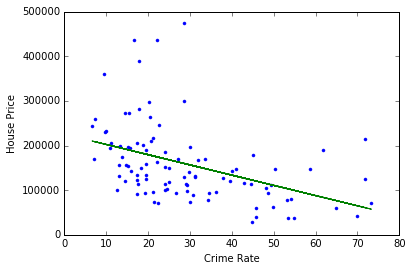

In [83]:
plt.xlabel('Crime Rate')
plt.ylabel('House Price')
plt.plot(X_noCC,y_noCC,'.',X_noCC,crime_model_noCC.predict(X_noCC),'-')

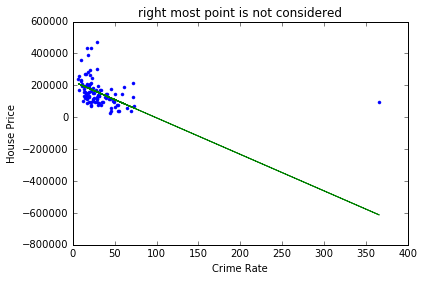

In [85]:
plt.plot(X,y,'.',X,crime_model_noCC.predict(X),'-')
plt.ylabel('House Price')
plt.xlabel('Crime Rate')
plt.title('right most point is not considered')

In [86]:
crime_model.intercept_,crime_model.coef_

(array([ 176629.40810695]), array([[-576.90812768]]))

In [87]:
crime_model_noCC.intercept_,crime_model_noCC.coef_

(array([ 225233.551839]), array([[-2288.68942995]]))